In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_NW_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,NaN,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,NaN
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,NaN,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	37
float64		column 2	37
float64		column 3	74
float64		column 4	37
float64		column 5	37
float64		column 6	148
float64		column 7	111
float64		column 8	111


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1447.000000,1447.000000,1410.000000,1447.000000,1447.000000,1336.000000,1373.000000,1373.000000
mean,0.500615,0.500435,0.501234,0.260194,0.504838,0.006714,0.499927,0.275324
std,0.136556,0.123182,0.085918,0.135617,0.048960,0.071840,0.057960,0.103157
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,0.990000


<AxesSubplot:>

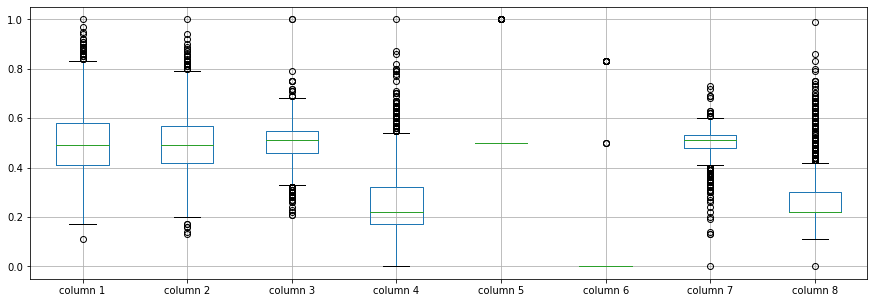

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.500615
column 2    0.500435
column 3    0.501234
column 4    0.260194
column 5    0.504838
column 6    0.006714
column 7    0.499927
column 8    0.275324
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.575929,-0.160815,0.154981,0.066103,-0.007431,0.051771,-0.127459
column 2,0.575929,1.000000,-0.263332,0.146027,0.057040,-0.004006,0.084979,-0.110111
column 3,-0.160815,-0.263332,1.000000,0.067849,-0.012377,0.005774,-0.188097,-0.011176
column 4,0.154981,0.146027,0.067849,1.000000,-0.005863,-0.002791,-0.091712,-0.023688
column 5,0.066103,0.057040,-0.012377,-0.005863,1.000000,-0.009100,0.051349,0.006018
column 6,-0.007431,-0.004006,0.005774,-0.002791,-0.009100,1.000000,0.020301,-0.033952
column 7,0.051771,0.084979,-0.188097,-0.091712,0.051349,0.020301,1.000000,0.061696
column 8,-0.127459,-0.110111,-0.011176,-0.023688,0.006018,-0.033952,0.061696,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+30,8+30+30,8+30+30+30,8+30+30+30+30,8+30+30+30+30+30,8+30+30+30+30+30+30,8+30+30+30+30+30,8+30+30+30+30,8+30+30+30,8+30+30,8+30,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.890989249167235
Epoch: 1 , loss: 2.4234783234803574
Epoch: 2 , loss: 2.2036717948706253
Epoch: 3 , loss: 2.0455891891666083
Epoch: 4 , loss: 1.912478170965029
Epoch: 5 , loss: 1.8307674293932708
Epoch: 6 , loss: 1.7373773170554119
Epoch: 7 , loss: 1.6715247255304586
Epoch: 8 , loss: 1.57752778996592
Epoch: 9 , loss: 1.5472185119338657
Epoch: 10 , loss: 1.4917656766331715
Epoch: 11 , loss: 1.4450115367122318
Epoch: 12 , loss: 1.410547102275102
Epoch: 13 , loss: 1.3597673333209495
Epoch: 14 , loss: 1.339613578889681
Epoch: 15 , loss: 1.319592148065567
Epoch: 16 , loss: 1.2815822298112123
Epoch: 17 , loss: 1.2807834802762321
Epoch: 18 , loss: 1.244012999145881
Epoch: 19 , loss: 1.2125149751486985
Epoch: 20 , loss: 1.2022432348002559
Epoch: 21 , loss: 1.1806482439455779
Epoch: 22 , loss: 1.1918107763580654
Epoch: 23 , loss: 1.1551331514897554
Epoch: 24 , loss: 1.152326455582743
Epoch: 25 , loss: 1.1292528

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.0,0.0,0.0,0.0,-0.000172,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.060758
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1479,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1480,0.0,0.0,0.0,0.0,0.0,-0.000254,0.000000,0.000000
1481,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1482,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(3.7250267931590924, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.07941786153890772

In [18]:
new_df.iloc[66,:]

column 1    0.46
column 2    0.49
column 3    0.58
column 4    0.23
column 5    0.50
column 6    0.00
column 7    0.44
column 8    0.22
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,-0.000172,0.480000,0.220000
1,0.43,0.67,0.48,0.27,0.5,0.000000,0.530000,0.220000
2,0.64,0.62,0.49,0.15,0.5,0.000000,0.530000,0.220000
3,0.58,0.44,0.57,0.13,0.5,0.000000,0.540000,0.280758
4,0.42,0.44,0.48,0.54,0.5,0.000000,0.480000,0.220000
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.000000,0.500000,0.220000
1480,0.35,0.29,0.46,0.14,0.5,-0.000254,0.540000,0.660000
1481,0.41,0.47,0.50,0.14,0.5,0.000000,0.530000,0.370000
1482,0.51,0.45,0.62,0.25,0.5,0.000000,0.590000,0.220000


In [20]:
imputations[-1].to_excel("Yeast_NW_5(imp).xlsx", index=False, header=False)